In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.cluster import KMeans

In [4]:
df = pd.read_csv('911.csv')
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [7]:
df['zip'].isnull().sum()

12855

In [9]:
df['type'] = df['title'].apply(lambda x: x.split(':')[0])
#df.head()

In [10]:
df.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e',
       'type'],
      dtype='object')

In [12]:
df = df.dropna(subset=['lat', 'lng']).drop(columns=['desc', 'timeStamp', 'twp', 'addr', 'e'])
df.head()

,lat,lng,zip,title,type
0,40.297876,-75.581294,19525.0,EMS: BACK PAINS/INJURY,EMS
1,40.258061,-75.264680,19446.0,EMS: DIABETIC EMERGENCY,EMS
2,40.121182,-75.351975,19401.0,Fire: GAS-ODOR/LEAK,Fire
3,40.116153,-75.343513,19401.0,EMS: CARDIAC EMERGENCY,EMS
4,40.251492,-75.603350,NaN,EMS: DIZZINESS,EMS


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   lat     99492 non-null  float64
 1   lng     99492 non-null  float64
 2   zip     86637 non-null  float64
 3   title   99492 non-null  object 
 4   type    99492 non-null  object 
dtypes: float64(3), object(2)
memory usage: 3.8+ MB


In [17]:
zip_counts = df.groupby(['zip', 'type']).size().unstack().fillna(0)

In [18]:
zip_counts

type,EMS,Fire,Traffic
zip,,,
17752.0,1.0,0.0,0.0
18036.0,2.0,0.0,0.0
18041.0,273.0,84.0,57.0
18054.0,146.0,56.0,124.0
18056.0,4.0,2.0,0.0
...,...,...,...
19512.0,177.0,9.0,34.0
19518.0,55.0,1.0,1.0
19525.0,510.0,160.0,295.0


In [20]:
zip_counts_norm = zip_counts.div(zip_counts.sum(axis=1), axis=0)
#zip_counts_norm

In [22]:
kmeans = KMeans(n_clusters=3, n_init=10, random_state=0)
kmeans.fit(zip_counts_norm)

C:\Users\diego\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, n_init=10, random_state=0)

In [23]:
from pandas.core.reshape.pivot import pivot
pivot = pd.pivot_table(df, index='zip', columns='type', values='lat', aggfunc='count')

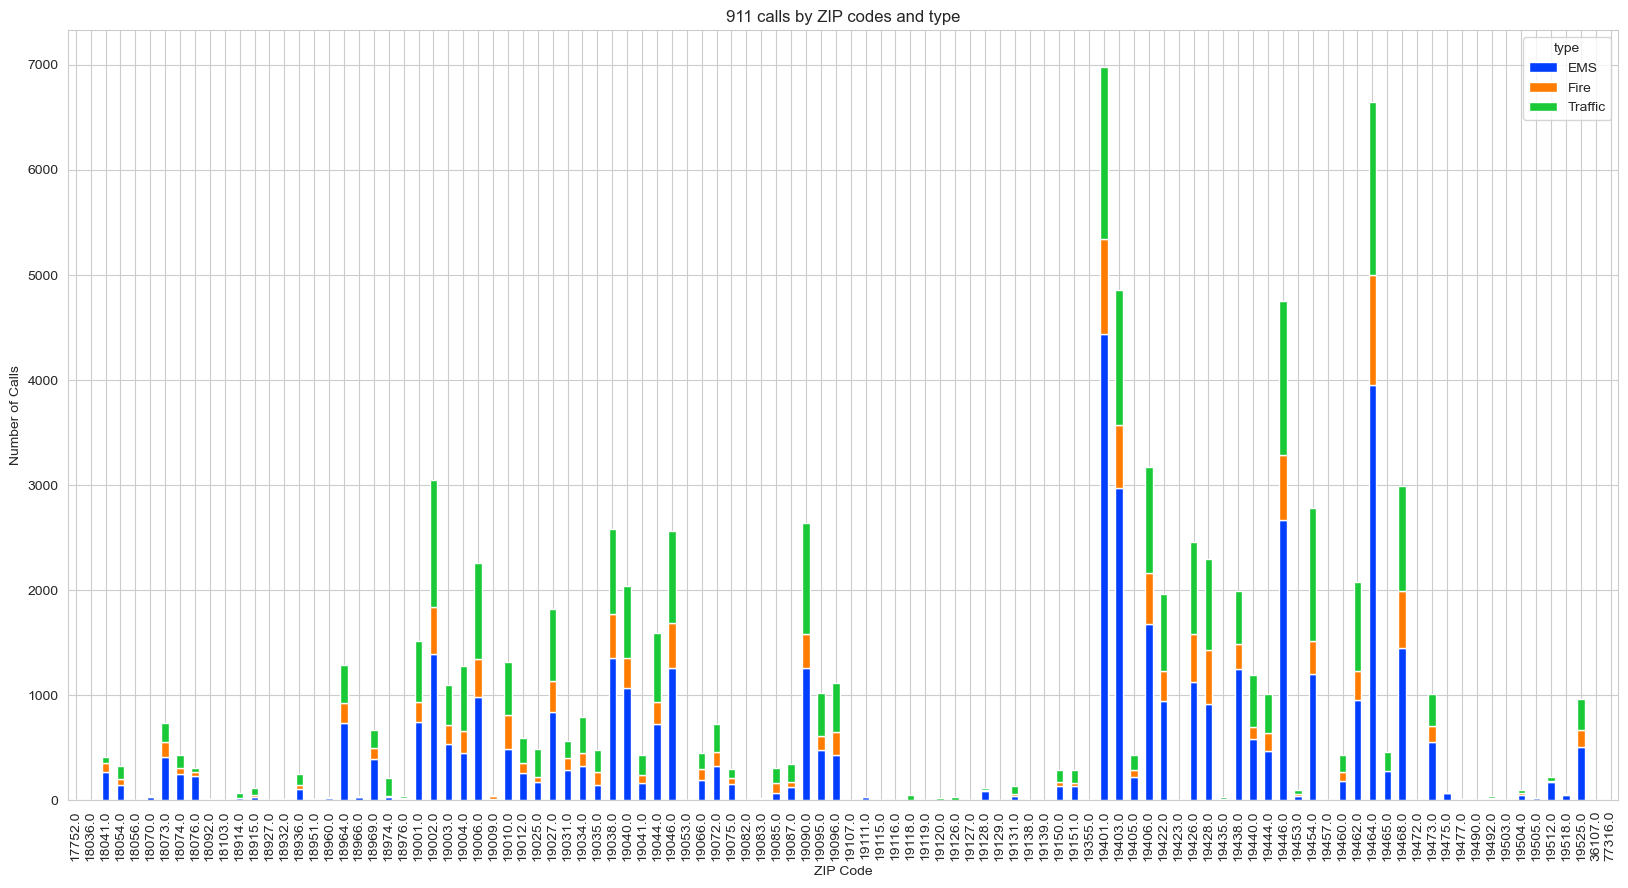

In [25]:
sns.set_style('whitegrid')
sns.set_palette('bright')
pivot.plot(kind='bar', stacked=True, figsize=(20,10))
plt.title('911 calls by ZIP codes and type')
plt.xlabel('ZIP Code')
plt.ylabel('Number of Calls')
plt.show()